In [189]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time

import os
import sys

path_ = os.path.abspath(os.path.join('..', '00_utils'))
if path_ not in sys.path:
    sys.path.append(path_)
    
import analyse_results
reload_module = analyse_results.reload_module

Graphs = reload_module('analyse_results', 'Graphs')
Results = reload_module('analyse_results', 'Results')

## Network Size

In [206]:
with open('results/jax_diffrax_results_new.pkl', 'rb') as file:
    results_jax_diffrax = pickle.load(file)

with open('results/jax_single_network_size.pkl', 'rb') as file:
    results_jax_diffrax = pickle.load(file)
    
# pyomo_network_size
with open('results/networks_size_pyomo.pkl', 'rb') as file:
    results_pyomo = pickle.load(file)

In [202]:
def custom_sort_key(lst):
    return (len(lst), lst)

In [210]:
results_pyomo.keys()

dict_keys(['acc_train_pm', 'acc_test_pm', 'time_pm'])

In [217]:
df_jd = Results.collect_data_toy(results_jax_diffrax)
#df_pyomo = Results.collect_data_toy(results_pyomo)
display(df_jd.head())
#display(df_pyomo.head())

jd_train = Results.prep_for_boxplots(df_jd,  'param1',  'mse_train')
jd_test = Results.prep_for_boxplots(df_jd,  'param1',  'mse_test')
jd_time = Results.prep_for_boxplots(df_jd,  'param1',  'time_elapsed')
# pyomo = Results.prep_for_boxplots(df_pyomo,  'param1',  'mse_train')

acc_train_pm = results_pyomo['acc_train_pm']
acc_test_pm = results_pyomo['acc_test_pm']
time_pm = results_pyomo['time_pm']

,param1,param2,param3,time_elapsed,mse_train,mse_test
0,"[2, 8, 2]",0.00001,"[1000, 5000]",5.648213,0.24518035,1.2241147
1,"[2, 8, 2]",0.00001,"[1000, 7500]",7.154367,0.13988426,1.4688191
2,"[2, 8, 2]",0.00001,"[1000, 10000]",9.106754,0.11573855,1.2738026
3,"[2, 8, 2]",0.00010,"[1000, 5000]",6.372325,0.24506076,1.226614
4,"[2, 8, 2]",0.00010,"[1000, 7500]",6.899179,0.13776134,1.3288945


In [218]:
def sort(df, key):
    df['sort_key'] = df[key].apply(custom_sort_key)
    df = df.sort_values(by='sort_key')
    return df

df_train = sort(jd_train, 'x_labels')
df_test = sort(jd_test, 'x_labels')
df_time = sort(jd_time, 'x_labels')


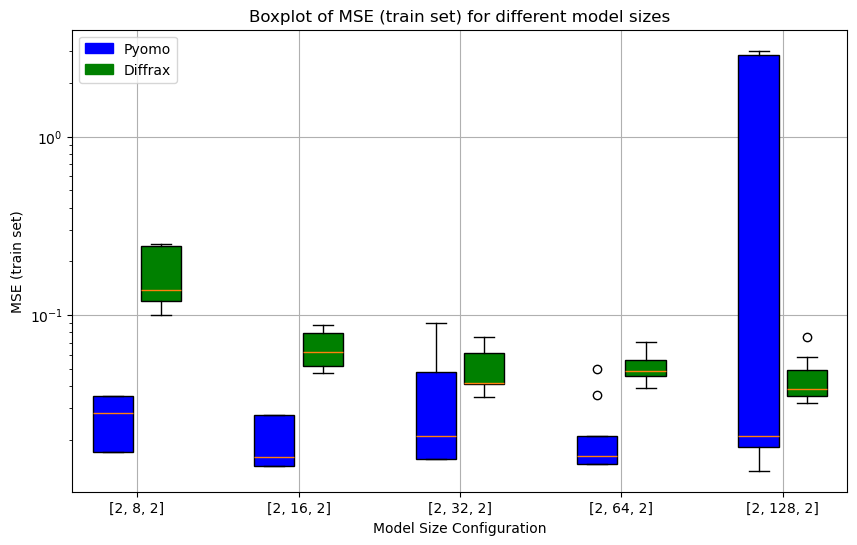

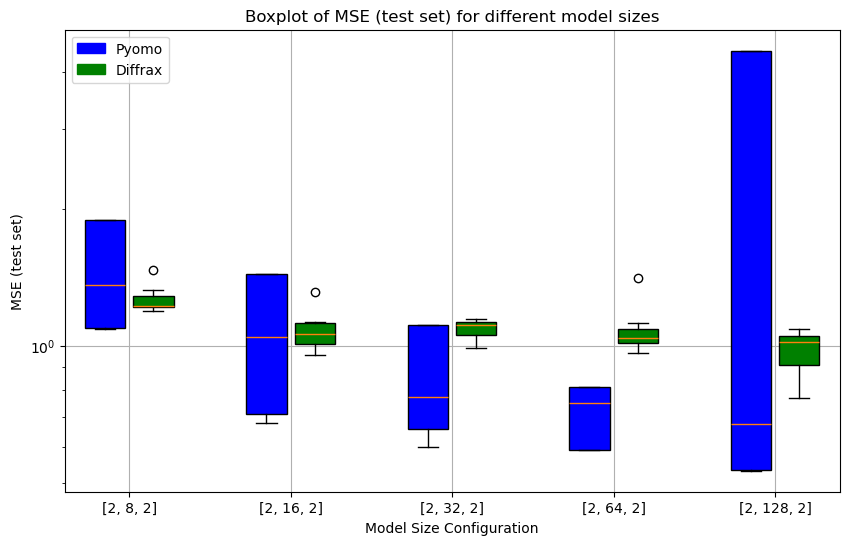

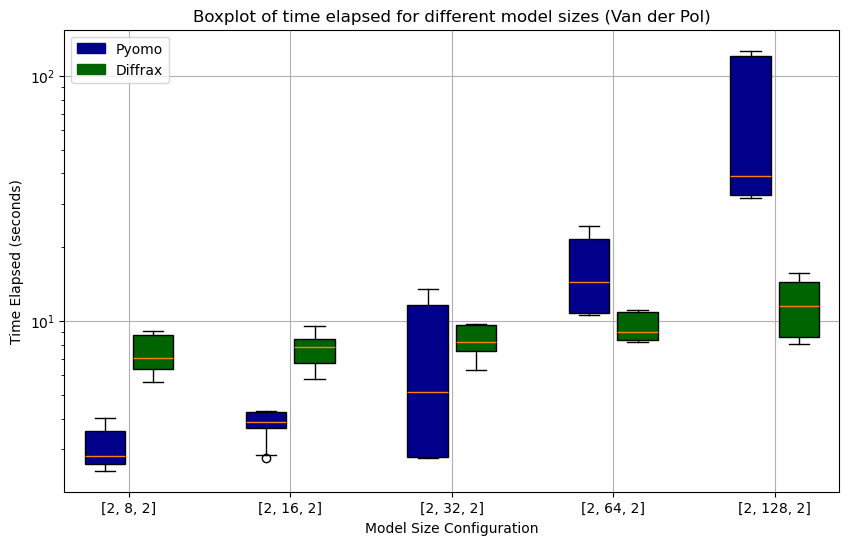

In [220]:
Graphs.plot_boxplots(acc_train_pm, df_train.mse_train, df_train.x_labels.tolist(), 
              'Boxplot of MSE (train set) for different model sizes', 
              'MSE (train set)')

Graphs.plot_boxplots(acc_test_pm, df_test.mse_test, df_train.x_labels.tolist(), 
              'Boxplot of MSE (test set) for different model sizes', 
              'MSE (test set)')

Graphs.plot_boxplots(time_pm, df_time.time_elapsed, df_train.x_labels.tolist(), 
              'Boxplot of time elapsed for different model sizes (Van der Pol)', 
              'Time Elapsed (seconds)',
              colors=('darkblue', 'darkgreen'))

In [196]:
# Graphs.plot_boxplots(pyomo.mse_train, jd.mse_train, jd.x_labels.tolist(), 'toy', 'jax_diffrax')

## Regularization

In [58]:
with open('results/jax_regularization_new.pkl', 'rb') as file:
    results_jax_diffrax_reg = pickle.load(file)
    
with open('results/jax_regularization_vdp_new.pkl', 'rb') as file:
    results_jax_diffrax_reg_vdp = pickle.load(file)

In [57]:
df_ho = Results.collect_data_toy(results_jax_diffrax_reg)
df_ho
#df.rename(columns={'param1': 'time (s)'}

,param1,time_elapsed,mse_train,mse_test
0,0.000000,6.474164,0.0005807362,0.0028394673
1,0.000001,9.054825,0.00058053515,0.0028393911
2,0.000100,6.025353,0.0005636947,0.0028195188
3,0.001000,6.005993,0.00050019333,0.0025141044
4,0.010000,6.002653,0.00089586957,0.0020690216
5,0.100000,5.783183,0.42673513,0.59479266
6,1.000000,5.708235,0.5204039,0.83104086


In [59]:
df_vdp = Results.collect_data_toy(results_jax_diffrax_reg_vdp)
df_vdp

,param1,time_elapsed,mse_train,mse_test
0,0.000000,6.436152,0.067447595,0.92960733
1,0.000001,9.384097,0.0724483,1.0092293
2,0.000100,6.388523,0.061078433,0.99860257
3,0.001000,6.337719,0.07563466,1.1002774
4,0.010000,6.232966,0.20128809,0.8228618
5,0.100000,6.117193,0.43868512,2.5796385
6,1.000000,5.900693,3.090921,5.8198147


## Activation

In [199]:
with open ('results/jax_activation.pkl', 'rb') as file:
    results_jax_activation = pickle.load(file)

In [200]:
df_activation = Results.collect_data_toy(results_jax_activation)
df_activation

,param1,param2,time_elapsed,mse_train,mse_test
0,tanh,vdp,6.627704,0.07563466,1.1002774
1,tanh,ho,6.273873,0.00050019333,0.0025141044
2,tanh,do,6.500363,7.38234e-05,0.00038291252
3,relu,vdp,5.999262,0.23687467,0.5228482
4,relu,ho,5.918798,0.0011768446,0.009721099
5,relu,do,6.074695,0.00042997755,0.031728044
6,sigmoid,vdp,6.333864,0.41269898,1.6332616
7,sigmoid,ho,6.168970,0.0016366731,0.0037894556
8,sigmoid,do,5.810764,0.000104914165,0.0002763628
